In [ ]:
!pip install seclea-ai==1.0.2
!conda install seclea-ai==1.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickleDB: filename=pickleDB-0.9.2-py3-none-any.whl size=4269 sha256=6d7902ba34035f3a979621f27c8dcea9af2283d13445abb11e2bec8d6d75f415
  Stored in directory: /root/.cache/pip/wheels/88/91/d4/ef2e6a46ad2bc41f9cfad35fa2db5b34357a5e4da67c385ffa
Successfully built pickleDB
/bin/bash: conda: command not found


In [ ]:
from seclea_ai import SecleaAI

# NOTE - use the organization name provided to you when issued credentials.
seclea = SecleaAI(project_name="Churn2", organization='Seclea')

Username: mariaantony
Password: ··········
success


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape


(10000, 14)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# define the metadata for the dataset.
dataset_metadata = {"outcome_name": "Exited",
                    "favourable_outcome": "1",
                    "unfavourable_outcome": "0",
                    "continuous_features": [
                                            "EstimatedSalary",
                                            'IsActiveMember',
                                            'HasCrCard',
                                            'NumOfProducts',
                                            'Balance',
                                            'Tenure',
                                            'Age',
                                            'CreditScore',
                                            'CustomerId',
                                            'RowNumber',
                                            ]}



In [ ]:
# ⬆️ upload the dataset - pick a meaningful name here, you'll be seeing it a lot on the platform!
seclea.upload_dataset(dataset=data, dataset_name="Churn", metadata=dataset_metadata)

In [ ]:
# Create a copy to isolate the original dataset
df1 = data.copy(deep=True)

def encode_nans(df):
    # convert the special characters to nans
    return df.replace('?', np.NaN)

df2 = encode_nans(df1)

In [ ]:
## Drop the the column which are more than some proportion NaN values
def drop_nulls(df, threshold):
    cols = [x for x in df.columns if df[x].isnull().sum() / df.shape[0] > threshold]
    return df.drop(columns=cols)

# We choose 95% as our threshold
null_thresh = 0.95
df3 = drop_nulls(df2, threshold=null_thresh)

def drop_correlated(data, thresh):
    import numpy as np

    # calculate correlations
    corr_matrix = data.corr().abs()
    # get the upper part of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # columns with correlation above threshold
    redundant = [column for column in upper.columns if any(upper[column] >= thresh)]
    print(f"Columns to drop with correlation > {thresh}: {redundant}")
    new_data = data.drop(columns=redundant)
    return new_data

# drop columns that are too closely correlated
correlation_threshold = 0.95
df4 = drop_correlated(df3, correlation_threshold)

Columns to drop with correlation > 0.95: []


<ipython-input-12-55dc1374a23b>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:

def drop_correlated(data, thresh):
  for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')
    return data.columns

In [ ]:

for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')

Number of unique data for RowNumber is 10000
unique data for RowNumber is [    1     2     3 ...  9998  9999 10000]
Number of unique data for CustomerId is 10000
unique data for CustomerId is [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Number of unique data for Surname is 2932
unique data for Surname is ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Number of unique data for CreditScore is 460
unique data for CreditScore is [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 80

In [ ]:
from seclea_ai.transformations import DatasetTransformation

# define the updates to the metadata - only changes are updated - here a continuous feature has been dropped so now
# we remove it from the list of continuous features.
processed_metadata = {"continuous_features": [
                                             "EstimatedSalary",
                                            'IsActiveMember',
                                            'HasCrCard',
                                            'NumOfProducts',
                                            'Balance',
                                            'Tenure',
                                            'Age',
                                            'CreditScore',
                                            'CustomerId',
                                            'RowNumber',
                                            ]}

# 🔀 define the transformations - note the arguments
cleaning_transformations = [
          
            DatasetTransformation(
                drop_nulls, data_kwargs={"df": "inherit"}, kwargs={"threshold": null_thresh}, outputs=["data"]
            ),
            DatasetTransformation(
                drop_correlated, data_kwargs={"data": "inherit"}, kwargs={"thresh": correlation_threshold}, outputs=["df"]
            ),
        ]


In [ ]:
# ⬆️ upload the cleaned datasets
#seclea.upload_dataset(dataset=df4,
 #                     dataset_name="Auto Churn-cleaned",
  #                    metadata=processed_metadata,
   #                   transformations=cleaning_transformations)

In [ ]:
data.drop(['RowNumber', 'CustomerId', 'Surname' ], axis=1, inplace=True)

In [ ]:
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')

Number of unique data for CreditScore is 460
unique data for CreditScore is [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737

In [ ]:
def fill_nan_const(df, val):
    """Fill NaN values in the dataframe with a constant value"""
    return df.replace(['None', np.nan], val)


# Fill nans in 1st dataset with -1
const_val = -1
df_const = fill_nan_const(df4, const_val)

In [ ]:
def fill_nan_mode(df, columns):
    """
    Fills nans in specified columns with the mode of that column
    Note that we want to make sure to not modify the dataset we passed in but to
    return a new copy.
    We do that by making a copy and specifying deep=True.
    """
    new_df = df.copy(deep=True)
    for col in df.columns:
        if col in columns:
            new_df[col] = df[col].fillna(df[col].mode()[0])
    return new_df


nan_cols = ['Balance','HasCrCard', 'IsActiveMember']
df_mode = fill_nan_mode(df4, nan_cols)

In [ ]:
def make_pie(feature) : 
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()

In [ ]:
def make_pie(feature) : 
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()
    return autopct

In [ ]:
# find columns with categorical data for both dataset
cat_cols = df_const.select_dtypes(include=['object']).columns.tolist()

def encode_categorical(df, cat_cols):
  from sklearn.preprocessing import LabelEncoder

  new_df = df.copy(deep=True)
  for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        new_df[col] = le.transform(list(df[col].astype(str).values))
  return new_df

df_const = encode_categorical(df_const, cat_cols)
df_mode = encode_categorical(df_mode, cat_cols)

# Update metadata with new encoded values for the outcome column.
encoded_metadata = {"favourable_outcome": 1,
                    "unfavourable_outcome": 0,}

In [ ]:
def make_countplot(feature) :
    sns.countplot(x=feature, data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("prism", 3)) 

In [ ]:
def make_kdeplot(feature) : 
    sns.kdeplot(data[feature], shade=True)

In [ ]:
def divide_feature(feature,n):
    return round((data[feature]- data[feature].min())/n)

In [ ]:
def make_label_encoder(original_feature , new_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)

In [ ]:
def make_standardization(feature) : 
    data[feature] =  (data[feature] - data[feature].mean()) / (data[feature].max() - data[feature].min())

In [ ]:
def make_report() : 
    print(classification_report(y_test,y_pred))
    print('************************************')
    CM = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix is : \n', CM)
    print('************************************')
    sns.heatmap(CM, center = True)
    plt.show()

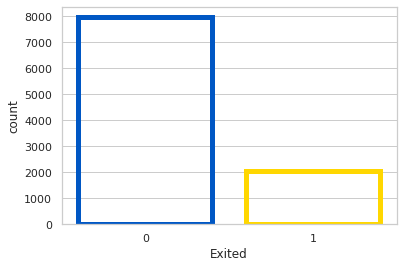

In [ ]:
make_countplot("Exited")


In [ ]:
len(data['CreditScore'].unique())


460

In [ ]:
data['temp'] = divide_feature('CreditScore',100)


In [ ]:
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,temp
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,3.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,3.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5.0


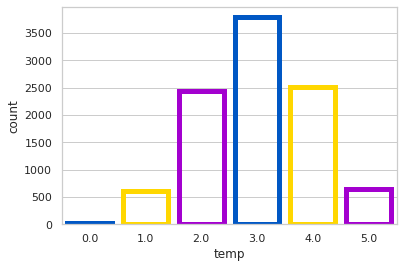

In [ ]:
make_countplot('temp')


In [ ]:
data.drop(["temp" ], axis=1, inplace=True)


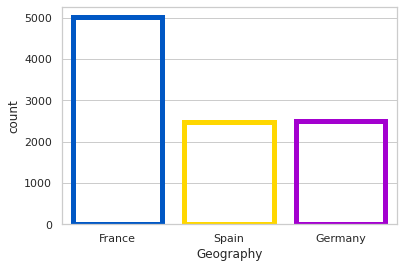

In [ ]:
make_countplot("Geography")


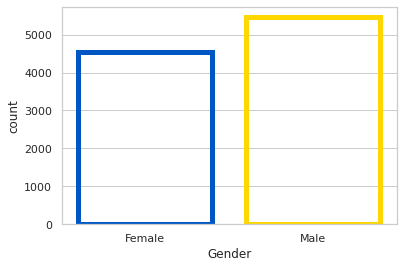

In [ ]:
make_countplot("Gender")


In [ ]:
data['temp'] = divide_feature('Age',10)


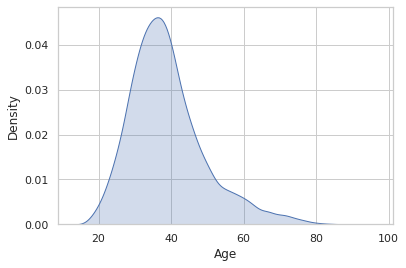

In [ ]:
make_kdeplot('Age')


In [ ]:
data.drop(["temp" ], axis=1, inplace=True)


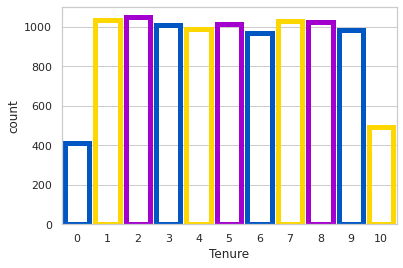

In [ ]:
make_countplot("Tenure")


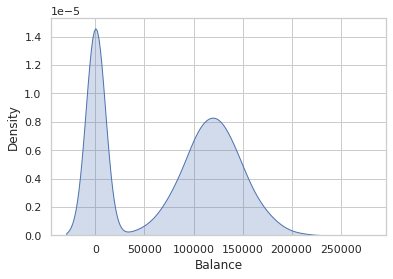

In [ ]:
make_kdeplot('Balance')


In [ ]:
data['temp'] = divide_feature('Balance',10000)
print('Number of Sectors are {}'.format(len(data['temp'].unique())))

Number of Sectors are 25


In [ ]:
data.drop(["temp" ], axis=1, inplace=True)


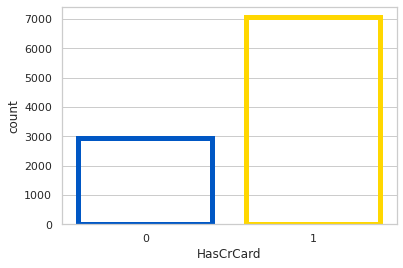

In [ ]:
make_countplot('HasCrCard')


In [ ]:
len(data['EstimatedSalary'].unique())


9999

In [ ]:
data['temp'] = divide_feature('EstimatedSalary',10000)
print('Number of Sectors are {}'.format(len(data['temp'].unique())))

Number of Sectors are 21


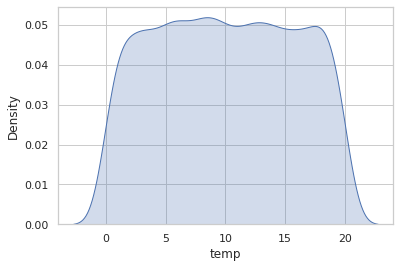

In [ ]:
make_kdeplot('temp')


In [ ]:
data.drop(["temp"], axis=1, inplace=True)


In [ ]:
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
make_label_encoder('Geography' , 'Geography Code')


In [ ]:
data.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,2


In [ ]:
make_label_encoder('Gender' , 'Gender Code')
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code,Gender Code
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [ ]:
data.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography Code,Gender Code
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


In [ ]:
# find columns with categorical data for both dataset
cat_cols = df_const.select_dtypes(include=['object']).columns.tolist()

def encode_categorical(df, cat_cols):
  from sklearn.preprocessing import LabelEncoder

  new_df = df.copy(deep=True)
  for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        le.fit(list(df[col].astype(str).values))
        new_df[col] = le.transform(list(df[col].astype(str).values))
  return new_df

df_const = encode_categorical(df_const, cat_cols)
df_mode = encode_categorical(df_mode, cat_cols)

# Update metadata with new encoded values for the outcome column.
encoded_metadata = {"favourable_outcome": 0,
                    "unfavourable_outcome": 1,}

In [ ]:
# 🔀 define the transformations - for the constant fill dataset
const_processed_transformations = [
    DatasetTransformation(fill_nan_const, data_kwargs={"df": df4}, kwargs={"val": const_val}, outputs=["df"]),
    DatasetTransformation(encode_categorical, data_kwargs={"df": "inherit"}, kwargs={"cat_cols":cat_cols}, outputs=["df"]),
]



# 🔀 define the transformations - for the mode fill dataset
mode_processed_transformations = [
    DatasetTransformation(fill_nan_mode, data_kwargs={"df": df4}, kwargs={"columns": nan_cols}, outputs=["df"]),
    DatasetTransformation(encode_categorical, data_kwargs={"df": "inherit"}, kwargs={"cat_cols": cat_cols}, outputs=["df"]),
]

In [ ]:
def get_samples_labels(df, output_col):
    X = data.drop(['Exited'], axis=1, inplace=False)
    y = data['Exited']

    return X, y

In [ ]:
# split the datasets into samples and labels ready for modelling.
X_const, y_const = get_samples_labels(df_const, "Exited")
X_mode, y_mode = get_samples_labels(df_mode, "Exited")

In [ ]:
def get_test_train_splits(X, y, test_size, random_state):
    from sklearn.model_selection import train_test_split

    return train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    # returns X_train, X_test, y_train, y_test

# split into test and train sets
X_train_const, X_test_const, y_train_const, y_test_const = get_test_train_splits(X_const, y_const, test_size=0.2, random_state=42)
X_train_mode, X_test_mode, y_train_mode, y_test_mode = get_test_train_splits(X_mode, y_mode, test_size=0.2, random_state=42)

In [ ]:
# 🔀 define the transformations - for the constant fill training set
const_train_transformations = [
    DatasetTransformation(
            get_test_train_splits,
            data_kwargs={"X": X_const, "y": y_const},
            kwargs={"test_size": 0.2, "random_state": 42},
            outputs=["X_train_const", None, "y_train_const", None],
            split="train",
            ),
]


In [ ]:
# ⬆️ upload the const fill training set
#seclea.upload_dataset_split(
 #                       X=X_train_const,
  #                      y=y_train_const,
   #                     dataset_name="Churn - Const Fill - Train",
    #                    metadata={},
     #                   transformations=const_train_transformations
#)

In [ ]:
# 🔀 define the transformations - for the constant fill test set
const_test_transformations = [
    DatasetTransformation(
            get_test_train_splits,
            data_kwargs={"X": X_const, "y": y_const},
            kwargs={"test_size": 0.2, "random_state": 42},
            outputs=[None, "X_test_const", None, "y_test_const"],
            split="test"
            ),
]

In [ ]:
# ⬆️ upload the const fill test set
#seclea.upload_dataset_split(X=X_test_const,
 #                     y=y_test_const,
  #                    dataset_name="Auto Insurance Fraud - Const Fill - Test",
   #                   metadata={},
    #                  transformations=const_test_transformations)

In [ ]:
classifiers = {
    "LogisticRegressionModel": LogisticRegression(),
   
}

In [ ]:
# ⬆️ upload the cleaned datasets
#seclea.upload_dataset(dataset=df4,
 #                     dataset_name="Auto Insurance Fraud - Cleaned",
  #                    metadata=processed_metadata,
   #                   transformations=cleaning_transformations)

In [ ]:
datasets = [
    ("df4", (X_train_const, X_test_const, y_train_const, y_test_const)),
    ("df4", (X_train_mode, X_test_mode, y_train_mode, y_test_mode)),
    
    ]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [ ]:
for name, (X_train, X_test, y_train, y_test) in datasets:

    for key, classifier in classifiers.items():
        # cross validate to get an idea of generalisation.
        training_score = cross_val_score(classifier, X_train, y_train, cv=5)

        # train on the full training set
        classifier.fit(X_train, y_train)

        # ⬆️ upload the fully trained model
       # seclea.upload_training_run_split(model=classifier, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

        # test accuracy
        y_preds = classifier.predict(X_test)
        test_score = accuracy_score(y_test, y_preds)
        print(f"Classifier: {classifier.__class__.__name__} has a training score of {round(training_score.mean(), 3) * 100}% accuracy score on {name}")
        print(f"Classifier: {classifier.__class__.__name__} has a test score of {round(test_score, 3) * 100}% accuracy score on {name}")

Classifier: LogisticRegression has a training score of 78.9% accuracy score on df4
Classifier: LogisticRegression has a test score of 79.60000000000001% accuracy score on df4
Classifier: LogisticRegression has a training score of 78.9% accuracy score on df4
Classifier: LogisticRegression has a test score of 79.60000000000001% accuracy score on df4


In [ ]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=33, solver='sag')

In [ ]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.79625
LogisticRegressionModel Test Score is :  0.7965
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [100]
----------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Exception ignored in: <function Tracked.__del__ at 0x7eff0727a040>


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000

************************************
Confusion Matrix is : 
 [[1593    0]
 [ 407    0]]
************************************


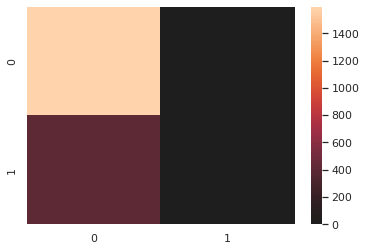

In [ ]:
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
make_report()